<center><h1>Churn Prediction</h1></center>

## 3.1 Churn Prediction Project

- Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
- https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

## 3.2 Churn Preparation

In [109]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [110]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [111]:
!wget $data -O data-week-3.csv

--2025-10-25 19:38:02--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.008s  

2025-10-25 19:38:02 (110 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [112]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [113]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [115]:
# To solve the null issue, in the TotalCharges column, we can convert the column to numeric,
# setting errors='coerce' to convert invalid parsing to NaN, and then fill those NaN values with 0.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')
df.TotalCharges = df.TotalCharges.fillna(0)

In [116]:
# Make the variable as categorical type
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [117]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    if df[c].dtype == 'object':
        df[c] = df[c].astype(str).str.lower().str.replace(' ', '_')

In [118]:
df.churn = (df.churn == 'yes').astype(int)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   object 
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


## 3.3 Setting up the Validation Framework

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [122]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [123]:
len(df_full_train), len(df_test)

(5634, 1409)

In [124]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [125]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [126]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [127]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [128]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 EDA

In [129]:
df_full_train = df_full_train.reset_index(drop = True)
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [130]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [131]:
df_full_train.churn.value_counts(normalize = True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [132]:
global_churn_rate = df_full_train.churn.value_counts(normalize = True).values[1]
round(global_churn_rate, 2)

np.float64(0.27)

In [133]:
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   seniorcitizen     5634 non-null   object 
 3   partner           5634 non-null   object 
 4   dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   phoneservice      5634 non-null   object 
 7   multiplelines     5634 non-null   object 
 8   internetservice   5634 non-null   object 
 9   onlinesecurity    5634 non-null   object 
 10  onlinebackup      5634 non-null   object 
 11  deviceprotection  5634 non-null   object 
 12  techsupport       5634 non-null   object 
 13  streamingtv       5634 non-null   object 
 14  streamingmovies   5634 non-null   object 
 15  contract          5634 non-null   object 
 16  paperlessbilling  5634 non-null   object 


In [134]:
# Select numeric columns (int + float)
num_vars = [
    c for c in df_full_train.select_dtypes(include=['int64', 'float64']).columns
    if c != 'churn'
]

# Select categorical columns (object), excluding ID
cat_vars = [
    c for c in df_full_train.select_dtypes(include=['object']).columns
    if c != 'customerid'
]

print("Numerical variables:", num_vars)
print("Categorical variables:", cat_vars)

Numerical variables: ['tenure', 'monthlycharges', 'totalcharges']
Categorical variables: ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']


In [135]:
df_full_train[cat_vars].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature Importance: Churn Rate and Risk Ratio

### 📊 Churn Interpretation Notes

1. **Difference**
   - **Formula:** `Global - Group`
   - **Interpretation:**
     - `< 0` → Group is **more likely to churn**
     - `> 0` → Group is **less likely to churn**

2. **Risk Ratio**
   - **Formula:** `Risk = Group / Global`
   - **Interpretation:**
     - `> 1` → Group is **more likely to churn**
     - `< 1` → Group is **less likely to churn**

### Churn Rate

In [136]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [137]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [138]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [139]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [140]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [141]:
global_churn - churn_partner

np.float64(0.06493474245795922)

In [142]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [143]:
global_churn - churn_no_partner

np.float64(-0.05984095297455855)

## Risk Ratio

In [144]:
churn_no_partner / global_churn

np.float64(1.2216593879412643)

In [145]:
churn_partner / global_churn

np.float64(0.7594724924338315)

In [146]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [147]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['ratio'] = df_group['mean'] / global_churn
df_group

,mean,count,diff,ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [148]:
for c in cat_vars:
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['ratio'] = df_group['mean'] / global_churn
    print('\n', c)
    print(df_group)


 gender
            mean  count      diff     ratio
gender                                     
female  0.276824   2796  0.006856  1.025396
male    0.263214   2838 -0.006755  0.974980

 seniorcitizen
                   mean  count      diff     ratio
seniorcitizen                                     
0              0.242270   4722 -0.027698  0.897403
1              0.413377    912  0.143409  1.531208

 partner
             mean  count      diff     ratio
partner                                     
no       0.329809   2932  0.059841  1.221659
yes      0.205033   2702 -0.064935  0.759472

 dependents
                mean  count      diff     ratio
dependents                                     
no          0.313760   3968  0.043792  1.162212
yes         0.165666   1666 -0.104302  0.613651

 phoneservice
                  mean  count      diff     ratio
phoneservice                                     
no            0.241316    547 -0.028652  0.893870
yes           0.273049   5087  0.00

## 3.6 Feature Importance: Mutual Information

In [149]:
from sklearn.metrics import mutual_info_score

In [150]:
mutual_info_score(df_full_train.churn, df_full_train.contract) # the inverse order is the same

0.0983203874041556

In [151]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [152]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [153]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [154]:
MI = df_full_train[cat_vars].apply(mutual_info_churn_score).sort_values(ascending=False)
MI

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature Importance: Correlation

In [155]:
df_full_train[num_vars].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [156]:
df_full_train[num_vars].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [157]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [158]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [159]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

In [160]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [161]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [162]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

## 3.8 One-hot Encoding

In [163]:
from sklearn.feature_extraction import DictVectorizer

In [164]:
df_train[['gender', 'contract']].iloc[:100]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
...,...,...
95,male,one_year
96,female,month-to-month
97,male,month-to-month
98,male,one_year


In [165]:
df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

In [166]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')

In [167]:
dv = DictVectorizer(sparse = False)
dv.fit(dicts)
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [168]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In [169]:
# Apply to all categorical and numerical variables (It doesn't affect numerical variables)
dv = DictVectorizer(sparse=False)

train_dict = df_train[cat_vars + num_vars].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[cat_vars + num_vars].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [170]:
print(X_train.shape)
print(X_val.shape)

(4225, 46)
(1409, 46)


## 3.9 Logistic regression

In [171]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [172]:
z = np.linspace(-7, 7, 51)

In [173]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

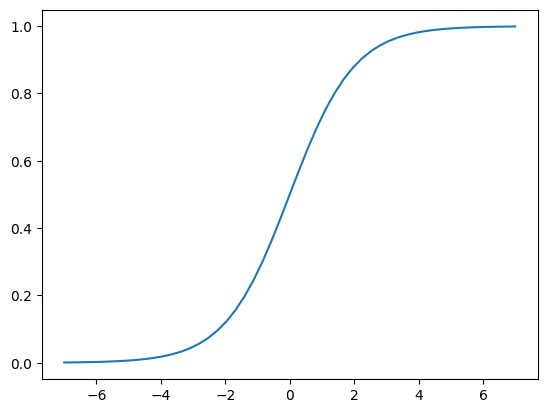

In [174]:
plt.plot(z, sigmoid(z))

In [175]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [176]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

## 3.10 Training Logistic Regression with Scikit-Learn

In [177]:
from sklearn.linear_model import LogisticRegression

In [178]:
model = LogisticRegression(solver='lbfgs')
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [179]:
model.intercept_[0]

np.float64(-0.09432828677754089)

In [180]:
model.coef_[0].round(3)

array([ 0.556, -0.152, -0.497, -0.014, -0.079,  0.078, -0.09 , -0.081,
       -0.024, -0.069, -0.334,  0.332, -0.09 ,  0.003, -0.254,  0.175,
       -0.014,  0.073, -0.09 , -0.076,  0.263, -0.09 , -0.266, -0.223,
        0.13 , -0.116,  0.023, -0.09 , -0.026,  0.054, -0.03 ,  0.175,
       -0.268, -0.131,  0.038, -0.09 , -0.09 ,  0.088, -0.042, -0.09 ,
        0.039,  0.206, -0.09 , -0.209, -0.072,  0.   ])

In [181]:
y_pred = model.predict_proba(X_val)[:, 1]

In [182]:
churn_decision = (y_pred >= 0.5)

In [183]:
(y_val == churn_decision).mean()

np.float64(0.7991483321504613)

In [184]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [185]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred.correct.mean()

np.float64(0.7991483321504613)

In [186]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

## 3.11 Model interpretation

In [187]:
a = [1, 2, 3, 4]
b = 'abcd'

In [188]:
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [189]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.556),
 'contract=one_year': np.float64(-0.152),
 'contract=two_year': np.float64(-0.497),
 'dependents=no': np.float64(-0.014),
 'dependents=yes': np.float64(-0.079),
 'deviceprotection=no': np.float64(0.078),
 'deviceprotection=no_internet_service': np.float64(-0.09),
 'deviceprotection=yes': np.float64(-0.081),
 'gender=female': np.float64(-0.024),
 'gender=male': np.float64(-0.069),
 'internetservice=dsl': np.float64(-0.334),
 'internetservice=fiber_optic': np.float64(0.332),
 'internetservice=no': np.float64(-0.09),
 'monthlycharges': np.float64(0.003),
 'multiplelines=no': np.float64(-0.254),
 'multiplelines=no_phone_service': np.float64(0.175),
 'multiplelines=yes': np.float64(-0.014),
 'onlinebackup=no': np.float64(0.073),
 'onlinebackup=no_internet_service': np.float64(-0.09),
 'onlinebackup=yes': np.float64(-0.076),
 'onlinesecurity=no': np.float64(0.263),
 'onlinesecurity=no_internet_service': np.float64(-0.09),
 'onlinesecurity=yes': 

In [190]:
small = ['contract', 'tenure', 'monthlycharges']

In [191]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [192]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [193]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [194]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [195]:
X_train_small = dv_small.transform(dicts_train_small)

In [196]:
model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [197]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.477957595284362)

In [198]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [199]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [200]:
-2.47 + (-0.948) + 30 * 0.027 + 24 * (-0.036)

-3.472

In [201]:
sigmoid(-2.47 + (-0.948) + 30 * 0.027 + 24 * (-0.036))

np.float64(0.03011950191351196)

## 3.12 Using the model

In [202]:
dicts_full_train = df_full_train[cat_vars + num_vars].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [203]:
y_full_train = df_full_train.churn.values

In [204]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [205]:
dicts_test = df_test[cat_vars + num_vars].to_dict(orient='records')
X_test = dv.transform(dicts_test)
y_pred = model.predict_proba(X_test)[:, 1]

In [206]:
churn_decision = (y_pred >= 0.5)

In [207]:
(churn_decision == y_test).mean()

np.float64(0.8140525195173882)

In [208]:
y_test

array([0, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [209]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': '0',
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [210]:
X_small = dv.transform([customer])

In [211]:
model.predict_proba(X_small)[0, 1]

np.float64(0.6656767752585829)

In [212]:
y_test[-1]

np.int64(1)